In [1]:
import os
import xml.etree.ElementTree as ET
import pandas as pd

def process_NER(folder_path):
    # Initialize lists to store data
    data = {'ID': [], 'ID entity': [], 'Offset': [], 'Text': [], 'Type': [], 'Full Sentence': []}

    # Iterate through all files in the folder
    for filename in os.listdir(folder_path):
        if filename.endswith(".xml"):
            file_path = os.path.join(folder_path, filename)

            # Parse the XML file
            tree = ET.parse(file_path)
            root = tree.getroot()

            # Iterate through each sentence in the XML
            for sentence in root.findall('.//sentence'):
                sentence_id = sentence.attrib['id']
                sentence_text = sentence.attrib['text']  # Get the text of the sentence

                # Iterate through each entity in the sentence
                for entity in sentence.findall('.//entity'):
                    entity_id = entity.attrib['id']
                    offset = entity.attrib['charOffset']
                    text = entity.attrib['text']
                    entity_type = entity.attrib['type']

                    # Append data to lists
                    data['ID'].append(sentence_id)
                    data['ID entity'].append(entity_id)
                    data['Offset'].append(offset)
                    data['Text'].append(text)
                    data['Type'].append(entity_type)
                    data['Full Sentence'].append(sentence_text)

    # Create a DataFrame from the data
    df_NER = pd.DataFrame(data)
    return df_NER

# Example usage:
folder_path = '/Users/benphan/NCKU/Courses/BioMedical_Information_Retrieval/Homework5/SemEval-2013-task-9/data/Devel'
df_NER = process_NER(folder_path)


In [2]:
df_NER.head(20)

,ID,ID entity,Offset,Text,Type,Full Sentence
0,DDI-DrugBank.d481.s0,DDI-DrugBank.d481.s0.e0,25-31,calcium,drug,"Milk, milk products, and calcium-rich foods or..."
1,DDI-DrugBank.d481.s0,DDI-DrugBank.d481.s0.e1,82-86,EMCYT,brand,"Milk, milk products, and calcium-rich foods or..."
2,DDI-MedLine.d63.s0,DDI-MedLine.d63.s0.e0,36-43,naloxone,drug,Differential actions of intrathecal naloxone o...
3,DDI-MedLine.d63.s0,DDI-MedLine.d63.s0.e1,111-124,beta-endorphin,drug_n,Differential actions of intrathecal naloxone o...
4,DDI-MedLine.d63.s0,DDI-MedLine.d63.s0.e2,130-137,morphine,drug,Differential actions of intrathecal naloxone o...
5,DDI-MedLine.d63.s1,DDI-MedLine.d63.s1.e0,46-52,opioids,group,"In the present study, it is proposed that the ..."
6,DDI-MedLine.d63.s2,DDI-MedLine.d63.s2.e0,64-71,naloxone,drug,The blockade of the spinal endorphinergic syst...
7,DDI-MedLine.d63.s2,DDI-MedLine.d63.s2.e1,144-157,beta-endorphin,drug_n,The blockade of the spinal endorphinergic syst...
8,DDI-MedLine.d63.s2,DDI-MedLine.d63.s2.e2,163-170,morphine,drug,The blockade of the spinal endorphinergic syst...
9,DDI-MedLine.d63.s3,DDI-MedLine.d63.s3.e0,30-43,beta-endorphin,drug_n,Intraventricular injection of beta-endorphin a...


In [3]:
df_NER.head()

,ID,ID entity,Offset,Text,Type,Full Sentence
0,DDI-DrugBank.d481.s0,DDI-DrugBank.d481.s0.e0,25-31,calcium,drug,"Milk, milk products, and calcium-rich foods or..."
1,DDI-DrugBank.d481.s0,DDI-DrugBank.d481.s0.e1,82-86,EMCYT,brand,"Milk, milk products, and calcium-rich foods or..."
2,DDI-MedLine.d63.s0,DDI-MedLine.d63.s0.e0,36-43,naloxone,drug,Differential actions of intrathecal naloxone o...
3,DDI-MedLine.d63.s0,DDI-MedLine.d63.s0.e1,111-124,beta-endorphin,drug_n,Differential actions of intrathecal naloxone o...
4,DDI-MedLine.d63.s0,DDI-MedLine.d63.s0.e2,130-137,morphine,drug,Differential actions of intrathecal naloxone o...


In [4]:
df_NER["Type"].value_counts()

drug      1045
group      454
brand      180
drug_n      92
Name: Type, dtype: int64

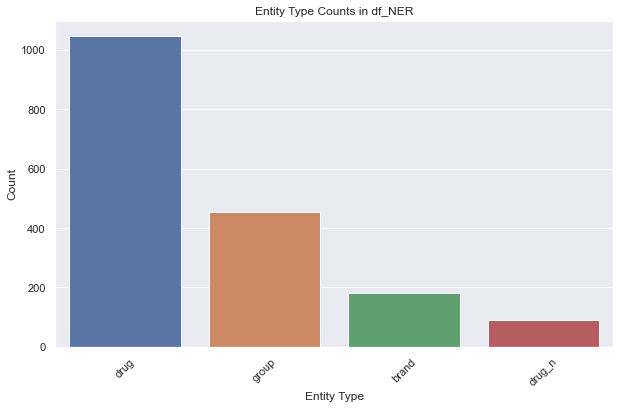

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_NER is already defined
type_counts = df_NER["Type"].value_counts()

# Create a count plot using seaborn
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))
sns.countplot(x="Type", data=df_NER, order=type_counts.index)

# Add labels and title
plt.xlabel("Entity Type")
plt.ylabel("Count")
plt.title("Entity Type Counts in df_NER")

# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=45)

# Show the plot
plt.show()


In [6]:
from transformers import BertTokenizer
import torch
from torch.utils.data import DataLoader, TensorDataset, random_split
# Load the pre-trained BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
# Encode the data
tokenized_input = tokenizer(list(df_NER['Text']), padding=True, truncation=True, return_tensors='pt', max_length=128)
# Create PyTorch dataset and dataloaders
labels = torch.tensor(pd.Categorical(df_NER['Type']).codes.tolist())
dataset = TensorDataset(tokenized_input['input_ids'], tokenized_input['attention_mask'], labels)
train_dataloader = DataLoader(dataset, batch_size=4, shuffle=True)